In [21]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [22]:
import pandas as pd
import numpy as np
import io

#reading dataset
#we can change sheet_name in case there are are multiple excel sheets within same excel file
df = pd.read_excel(io.BytesIO(uploaded['Lab Session Data.xlsx']) , sheet_name="Purchase data")
df.set_index('Customer', inplace=True)
# df
# A=df.iloc[:,1:4]
# print(A)
# C=df.iloc[:,4:5]
# print(C)
df=df.iloc[0:10,0:4]
Candies= df["Candies (#)"]
Mangoes = df["Mangoes (Kg)"]
Milk_Packets = df["Milk Packets (#)"]
Payment = df["Payment (Rs)"]

#we can either use iloc or manually select colums to seperate the matrices we need
#we should pass tuple of columns
A = np.column_stack((Candies, Mangoes, Milk_Packets))
C = Payment.values

#library function of numpy to find inverse of a matrix
pseudo_inv = np.linalg.pinv(A)

#x matrix is product of A inverse and C
X = pseudo_inv.dot(C)
rank_A = np.linalg.matrix_rank(A)
print(A)
print("The dimensionality of the vector space is the rank of the matrix")
print("The number of vectors in this vector space are ",rank_A)
print("Rank of A:", rank_A)
print("The cost of each product are ",X,"respectively.")

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
The dimensionality of the vector space is the rank of the matrix
The number of vectors in this vector space are  3
Rank of A: 3
The cost of each product are  [ 1. 55. 18.] respectively.


In [23]:
#making a new column showing the customer classification. the condition is given in first parameter , if it is satisfied , second parameter gets selected , else , third parameter gets selected
df['Customer Status'] = np.where(Payment > 200, 'Rich', 'Poor')
df

,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Customer Status
Customer,,,,,
C_1,20,6,2,386,Rich
C_2,16,3,6,289,Rich
C_3,27,6,2,393,Rich
C_4,19,1,2,110,Poor
C_5,24,4,2,280,Rich
C_6,22,1,5,167,Poor
C_7,15,4,2,271,Rich
C_8,18,4,2,274,Rich
C_9,21,1,4,148,Poor


In [24]:
df2 = pd.read_excel('Lab Session Data.xlsx',sheet_name="IRCTC Stock Price")
#library functions for mean and variance
mean=df2["Price"].mean()
variance=df2["Price"].var()
print("Mean:",mean)
print("Variance:",variance)

Mean: 1560.6634538152612
Variance: 58732.36535253918


In [25]:
#selecting all the wednesday rows and then finding mean of those selected rows
df_wed=df2[df2['Day'] =='Wed']
df_wed
df_wed['Price'].mean()

1550.7060000000001

In [26]:
#selecting all the april month rows and then finding mean of those selected rows
df_apr=df2[df2['Month'] =='Apr']
df_apr["Price"].mean()

1698.9526315789474

In [27]:
#we can use a lamda function to count days where loss occured.if change is negative (loss) , the function returns true or 1 ,else false(0)
loss=df2['Chg%'].apply(lambda x : x<0)
loss

#number of days with losses will be number of trues , that is number of 1s in a list of 1s and 0s. so if we sum all elements , we get numbe of days with loss
numberOfTrues=loss.sum()
totalRows=len(loss)

#probablity is favourable by total
print(numberOfTrues/totalRows)

0.4979919678714859


In [28]:
wednesday_stock=df_wed['Chg%']
profit=wednesday_stock.apply(lambda x : x>0)

#same formula like previous problem
profit.sum()/len(profit)

0.42

Text(0.5, 1.0, 'Scatter Plot of Chg% by Day of the Week')

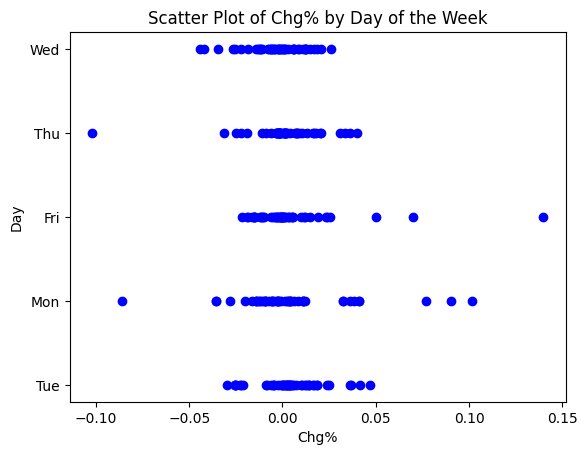

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df2['Chg%'], df2['Day'], color='blue', marker='o')
plt.xlabel('Chg%')
plt.ylabel('Day')
plt.title('Scatter Plot of Chg% by Day of the Week')

#plotting stock change percentage vs day it occured on
#scatter plot

Unique values in column sex   ['F' 'M' '?']
Suggested Encoding: Label Encoding
Unique values in column on thyroxine   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column query on thyroxine   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column on antithyroid medication   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column sick   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column pregnant   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column thyroid surgery   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column I131 treatment   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column query hypothyroid   ['t' 'f']
Suggested Encoding: Label Encoding
Unique values in column query hyperthyroid   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column lithium   ['f' 't']
Suggested Encoding: Label Encoding
Unique values in column goitre   ['f' 't']
Suggested Encoding: 

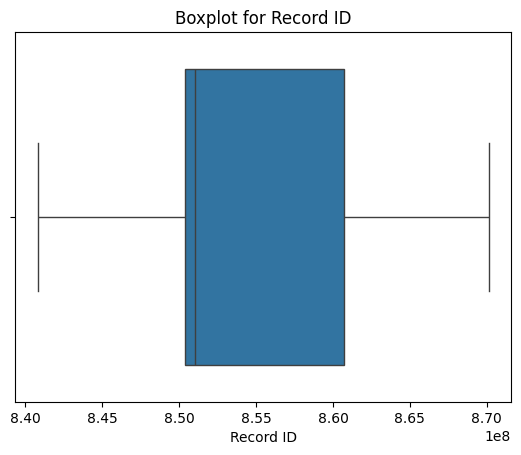

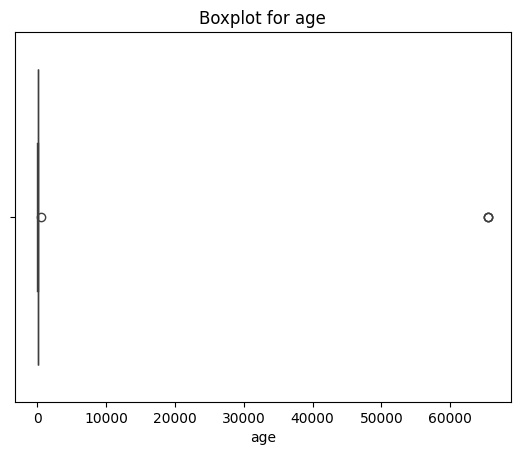

Mean and std. deviation for Record ID is 852947346.6122983 and 7581968.7803465845
Mean and std. deviation for age is 73.55582206716092 and 1183.976718044466


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

thyroid_data = pd.read_excel(io.BytesIO(uploaded['Lab Session Data.xlsx']) , sheet_name="thyroid0387_UCI")

#categorical data will be having object data type
#segregating categorical and numerical cols

categorical_cols = thyroid_data.select_dtypes(include=['object']).columns
numeric_cols = thyroid_data.select_dtypes(include=['int64']).columns


for col in categorical_cols:
    unique_values = thyroid_data[col].unique()
    print("Unique values in column", col, " ", unique_values)

    if len(unique_values) < 100:
      #if we have more than 100 unique values , we do lable encoding , else one hot
        print(f"Suggested Encoding: Label Encoding")
        thyroid_data[col] = thyroid_data[col].astype('category').cat.codes
    else:
        print(f"Suggested Encoding: One-Hot Encoding")
        thyroid_data = pd.get_dummies(thyroid_data, columns=[col], prefix=[col])

#displaying range for numeric attributes
for col in numeric_cols:
    print("Data range for numeric attribute", col, "is", thyroid_data[col].min(), "to", thyroid_data[col].max())

# Replacing missing values marked as '?' with NaN
thyroid_data.replace('?', np.nan, inplace=True)

# Print number of missing values in each feature
print("Number of missing values in each feature:")
missing_values_count = thyroid_data.isnull().sum()
print(missing_values_count)

# Display boxplots for numeric data to check for outliers
print("\nOutliers in Numeric Data:")
for col in numeric_cols:
    sns.boxplot(x=thyroid_data[col])
    plt.title("Boxplot for {}".format(col))
    plt.show()

# mean and standard deviation for numeric cols
for col in numeric_cols:
    print("Mean and std. deviation for", col, "is", thyroid_data[col].mean(), "and", thyroid_data[col].std())

In [31]:

thyroid_data = pd.read_excel(io.BytesIO(uploaded['Lab Session Data.xlsx']) , sheet_name="thyroid0387_UCI")
thyroid_data.replace('?', np.nan, inplace=True)

#numerical columns
numeric_cols_thyroid = thyroid_data.select_dtypes(include=['int64']).columns

# Impute missing values in numerical columns
for col in numeric_cols_thyroid:
    if thyroid_data[col].isnull().sum() > 0:
        if thyroid_data[col].skew() < 1:
          #incase of numeric data ,if skewness is less than 1 , we fill the missing values with mean , else , we fill the values with median
            thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mean())
            print("Column: {}, Imputation Method: Mean".format(col))
        else:
            thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].median())
            print("Column: {}, Imputation Method: Median".format(col))

#categorical columns
categorical_cols_thyroid = thyroid_data.select_dtypes(include=['object']).columns

# for categorical data , we will missing values with mode
for col in categorical_cols_thyroid:
    if thyroid_data[col].isnull().sum() > 0:
        thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mode()[0])
        print("Column: {}, Imputation Method: Mode".format(col))

Column: sex, Imputation Method: Mode


In [39]:
from sklearn.preprocessing import StandardScaler

# Display descriptive statistics for numeric columns
print(thyroid_data[numeric_cols_thyroid].describe())

# Standardize the 'age' column
#making a innstance of StandardScaler class
scaler = StandardScaler()

#fit transform expects 2d structure , so double sq bracketts
thyroid_data['age'] = scaler.fit_transform(thyroid_data[['age']])

print("Z-score Normalized 'age' Column:")
print(thyroid_data['age'])

          Record ID           age
count  9.172000e+03  9.172000e+03
mean   8.529473e+08 -1.549374e-18
std    7.581969e+06  1.000055e+00
min    8.408010e+08 -6.128480e-02
25%    8.504090e+08 -3.087714e-02
50%    8.510040e+08 -1.567331e-02
75%    8.607110e+08 -4.692765e-03
max    8.701190e+08  5.528488e+01
Z-score Normalized 'age' Column:
0      -0.037634
1      -0.037634
2      -0.027499
3      -0.031722
4      -0.035100
          ...   
9167   -0.014829
9168   -0.043547
9169   -0.003848
9170   -0.022431
9171   -0.035945
Name: age, Length: 9172, dtype: float64


In [40]:

# Setting pandas option to avoid silent downcasting warning
pd.set_option('mode.chained_assignment', None)  # Suppresses SettingWithCopyWarning


thyroid_data.replace('?', np.nan, inplace=True)
print("For thyroid data sheet")

# Identify binary columns in thyroid data
#to identify bninary cols , we traverse through all the columns , first drop the rows with null values , select all uniques values present in the column and make a set or a tuple of it
#if the set has atmost 2 values , it will be a binary column
binary_cols_thyroid = [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols_thyroid += [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'M', 'F'}]

# Replace binary values with 0 and 1
thyroid_data[binary_cols_thyroid] = thyroid_data[binary_cols_thyroid].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

# Calculate Jaccard and Simple Matching Coefficient for thyroid data for first 2
vector1_thyroid = thyroid_data.loc[0, binary_cols_thyroid].astype(int)
vector2_thyroid = thyroid_data.loc[1, binary_cols_thyroid].astype(int)

f11_thyroid = np.sum((vector1_thyroid == 1) & (vector2_thyroid == 1))
f00_thyroid = np.sum((vector1_thyroid == 0) & (vector2_thyroid == 0))
f10_thyroid = np.sum((vector1_thyroid == 1) & (vector2_thyroid == 0))
f01_thyroid = np.sum((vector1_thyroid == 0) & (vector2_thyroid == 1))

#formula of jc
jc_thyroid = f11_thyroid / (f01_thyroid + f10_thyroid + f11_thyroid)
#formula of smc
smc_thyroid = (f11_thyroid + f00_thyroid) / (f00_thyroid + f01_thyroid + f10_thyroid + f11_thyroid)

print("Jaccard Coefficient (JC) for thyroid data sheet:", jc_thyroid)
print("Simple Matching Coefficient (SMC) for thyroid data sheet:", smc_thyroid)

# Load and preprocess data from 'marketing_campaign' sheet
marketing_data = pd.read_excel(io.BytesIO(uploaded['Lab Session Data.xlsx']) , sheet_name="marketing_campaign")
marketing_data.replace('?', np.nan, inplace=True)
print("For marketing data sheet")

# Identify binary columns in marketing data
binary_cols_marketing = [col for col in marketing_data.columns if set(marketing_data[col].dropna().unique()) <= {0, 1}]

# Calculate Jaccard and Simple Matching Coefficient for marketing data
marketing_data[binary_cols_marketing] = marketing_data[binary_cols_marketing]

vector1_marketing = marketing_data.loc[0, binary_cols_marketing].astype(int)
vector2_marketing = marketing_data.loc[1, binary_cols_marketing].astype(int)

f11_marketing = np.sum((vector1_marketing == 1) & (vector2_marketing == 1))
f00_marketing = np.sum((vector1_marketing == 0) & (vector2_marketing == 0))
f10_marketing = np.sum((vector1_marketing == 1) & (vector2_marketing == 0))
f01_marketing = np.sum((vector1_marketing == 0) & (vector2_marketing == 1))

jc_marketing = f11_marketing / (f01_marketing + f10_marketing + f11_marketing)
smc_marketing = (f11_marketing + f00_marketing) / (f00_marketing + f01_marketing + f10_marketing + f11_marketing)

print("Jaccard Coefficient (JC) for marketing data sheet:", jc_marketing)
print("Simple Matching Coefficient (SMC) for marketing data sheet:", smc_marketing)

For thyroid data sheet
Jaccard Coefficient (JC) for thyroid data sheet: nan
Simple Matching Coefficient (SMC) for thyroid data sheet: nan


<ipython-input-40-113dfe2d5b26>:27: RuntimeWarning: invalid value encountered in scalar divide
  jc_thyroid = f11_thyroid / (f01_thyroid + f10_thyroid + f11_thyroid)
<ipython-input-40-113dfe2d5b26>:29: RuntimeWarning: invalid value encountered in scalar divide
  smc_thyroid = (f11_thyroid + f00_thyroid) / (f00_thyroid + f01_thyroid + f10_thyroid + f11_thyroid)


For marketing data sheet
Jaccard Coefficient (JC) for marketing data sheet: 0.0
Simple Matching Coefficient (SMC) for marketing data sheet: 0.8571428571428571


In [41]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

thyroid_data.replace('?', np.nan, inplace=True)

# Initialize label encoders for categorical cols
label_encoders = {}
for col in thyroid_data.select_dtypes(include=['object']).columns:
  #filling up missing values like before
    if thyroid_data[col].isnull().sum() > 0:
        thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mode()[0])
    #making instance of LabelEncoder
    encoder = LabelEncoder()
    thyroid_data[col] = encoder.fit_transform(thyroid_data[col])
    label_encoders[col] = encoder

# Fill missing values in numerical columns with mean
for col in thyroid_data.select_dtypes(include=[np.number]).columns:
    thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mean())

# Compute cosine similarity between the first and second rows
#just like before , we have to reshape the first 2 rows b/c cosine_similarity function also expects a 2d object
#.values to convrt pandas series to numpy array , first parameter of reshape is rows , second is columns
#1 indicates 1 row , -1 indicates to automatically determine number of columns
vector1 = thyroid_data.iloc[0].values.reshape(1, -1)
vector2 = thyroid_data.iloc[1].values.reshape(1, -1)

#cosine_similarity is lib function which is imported.it returns 2d object . in our case , we considered only 2 rows , so 1x1 matrix will be returned
cosine_similarity_value = cosine_similarity(vector1, vector2)[0][0]

print("Cosine Similarity:", cosine_similarity_value)

Cosine Similarity: 0.9999999999999997


<ipython-input-42-993d2b9607da>:55: RuntimeWarning: invalid value encountered in scalar divide
  jc_matrix[i, j] = f11 / (f01 + f10 + f11)
<ipython-input-42-993d2b9607da>:57: RuntimeWarning: invalid value encountered in scalar divide
  smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)
<ipython-input-42-993d2b9607da>:55: RuntimeWarning: invalid value encountered in scalar divide
  jc_matrix[i, j] = f11 / (f01 + f10 + f11)
<ipython-input-42-993d2b9607da>:57: RuntimeWarning: invalid value encountered in scalar divide
  smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)
<ipython-input-42-993d2b9607da>:55: RuntimeWarning: invalid value encountered in scalar divide
  jc_matrix[i, j] = f11 / (f01 + f10 + f11)
<ipython-input-42-993d2b9607da>:57: RuntimeWarning: invalid value encountered in scalar divide
  smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)
<ipython-input-42-993d2b9607da>:55: RuntimeWarning: invalid value encountered in scalar divide
  jc_matrix[i, j] = f11 / 

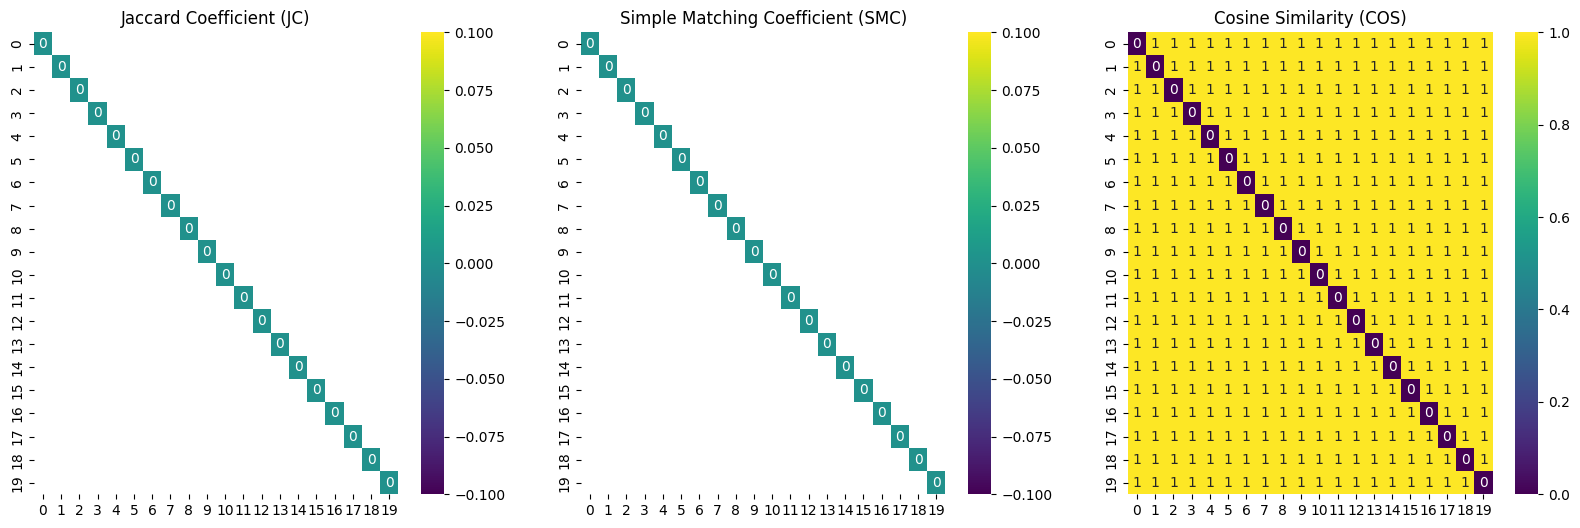

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

#identifing binary columns just like the previous code
binary_cols_thyroid = [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols_thyroid += [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'M', 'F'}]

# Replace binary values with 0 and 1
thyroid_data[binary_cols_thyroid] = thyroid_data[binary_cols_thyroid].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

# Label encode and imputing missing values , same like before
label_encoders = {}
for column in thyroid_data.select_dtypes(include=['object']).columns:
    if thyroid_data[column].isnull().sum() > 0:
        thyroid_data[column] = thyroid_data[column].fillna(thyroid_data[column].mode()[0])

    #label encoding after filling up missing values
    encoder = LabelEncoder()
    thyroid_data[column] = encoder.fit_transform(thyroid_data[column])
    label_encoders[column] = encoder

for column in thyroid_data.select_dtypes(include=[np.number]).columns:
    thyroid_data[column] = thyroid_data[column].fillna(thyroid_data[column].mean())

#creating matrices to store similarity measures for first 20 observations
#these 2d matrices can be directly given to sns to create a heatmap

#selecting first 20 rows
subset_thyroid_data = thyroid_data.iloc[:20]
#initializing the 3 matrices with 0s
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

# Calculating similarity measures
for i in range(20):
    for j in range(20):
        if i != j:
            #only one val is give for row , so we are selecting ith and jth row , all columns
            vector1 = subset_thyroid_data.iloc[i, :].values
            vector2 = subset_thyroid_data.iloc[j, :].values

            #here we filter for binary cols , which we have alredy replaced with 1s and 0s , so dataType will be int
            binary_vector1 = subset_thyroid_data.loc[i, binary_cols_thyroid].astype(int)
            binary_vector2 = subset_thyroid_data.loc[j, binary_cols_thyroid].astype(int)

            f11 = np.sum((binary_vector1 == 1) & (binary_vector2 == 1))
            f00 = np.sum((binary_vector1 == 0) & (binary_vector2 == 0))
            f10 = np.sum((binary_vector1 == 1) & (binary_vector2 == 0))
            f01 = np.sum((binary_vector1 == 0) & (binary_vector2 == 1))

            #formula of jc
            jc_matrix[i, j] = f11 / (f01 + f10 + f11)
            #formula of smc
            smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)

            #reshaping the vectors , just like previous code
            vector1_all = vector1.reshape(1, -1)
            vector2_all = vector2.reshape(1, -1)
            cosine_matrix[i, j] = cosine_similarity(vector1_all, vector2_all)[0][0]

# Plot the heatmaps
#we are making 1x3 subplots , 20inches wide , 6 inches tall
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
#if annot is true , cells will have values in them
#cmap is set to virdis , it is parameter to choose color scheme
sns.heatmap(jc_matrix, annot=True, cmap='viridis', ax=axs[0])
axs[0].set_title('Jaccard Coefficient (JC)')

sns.heatmap(smc_matrix, annot=True, cmap='viridis', ax=axs[1])
axs[1].set_title('Simple Matching Coefficient (SMC)')

sns.heatmap(cosine_matrix, annot=True, cmap='viridis', ax=axs[2])
axs[2].set_title('Cosine Similarity (COS)')

plt.show()